In [1]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import random as rand
import tqdm
import networkx as nx
import pickle as pkl
import gower
import matplotlib.pyplot as plt
import methods
from methods import topK, findGroups, prototype, ranking, getAttributes, Q, Q2, Discovery

In [3]:
from torch_geometric.datasets import Twitch

# Load the Tolokers dataset
dataset = Twitch(root='./data/Twitch', name='PT')

# Access the first graph in the dataset
data = dataset[0]

In [4]:
dataset = Twitch(root='./data/Twitch', name='PT')

# Custom wrapper to simulate GraphPropPredDataset structure
class CustomGraphDataset:
    def __init__(self, dataset):
        self.dataset = dataset

    def __getitem__(self, idx):
        # Extract a graph from the dataset
        graph_data = self.dataset[idx]
        
        # Convert to the desired dictionary format similar to GraphPropPredDataset
        graph = {
            'edge_index': graph_data.edge_index,  # Edge index
            'num_nodes': graph_data.num_nodes,  # Number of nodes
            'node_feat': graph_data.x  # Node features (if available)
        }
        
        label = graph_data.y
        return graph, label

    def __len__(self):
        return len(self.dataset)

# Instantiate the custom dataset
custom_dataset = CustomGraphDataset(dataset)
graph, label = custom_dataset[0]

# Access edge index, number of nodes, and node features
edge_index = graph['edge_index']
num_nodes = graph['num_nodes']

In [5]:
edge_index = data.edge_index 
num_nodes = data.num_nodes 
G = nx.Graph()

G.add_nodes_from(range(num_nodes))

edges = list(zip(edge_index[0].tolist(), edge_index[1].tolist()))  # Convert tensor to list of tuples
G.add_edges_from(edges)

In [6]:
label

tensor([0, 0, 0,  ..., 1, 0, 1])

In [7]:
attributes = graph['node_feat']
lu = pd.DataFrame(attributes)
lu['target'] = label == 1 # use the label binary explicit language as target variable?
lu.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,target
0,-0.213545,5.203393,-0.160547,-0.217247,-0.212379,-0.203340,-0.538649,-0.411488,-0.150398,-0.165370,...,-0.239307,-0.214107,-0.355245,-0.149007,-0.213861,-0.375776,1.312829,-0.255846,-0.183876,False
1,-0.236669,-0.230716,-0.160547,-0.130489,-0.212379,-0.203848,-0.538649,-0.411488,-0.162248,-0.223381,...,4.099865,-0.214107,-0.355245,-0.175422,0.012436,-0.373406,1.484898,-0.255846,-0.183876,False
2,-0.188405,-0.230716,-0.151268,-0.184601,-0.211119,-0.009926,-0.538649,-0.411488,-0.162248,-0.223381,...,-0.202553,-0.214107,-0.355245,-0.115830,-0.149139,-0.375621,1.406220,-0.255846,-0.172436,False
3,-0.206178,-0.230716,-0.160547,-0.217247,-0.172571,-0.203848,-0.538649,-0.411488,-0.162248,-0.223381,...,-0.174710,-0.214107,-0.355245,-0.175370,-0.200265,2.671659,1.353870,-0.255846,-0.183876,False
4,-0.236669,-0.230716,-0.160547,-0.217247,-0.212379,-0.202109,-0.538649,-0.411488,-0.162248,-0.223381,...,-0.239307,-0.214107,-0.355245,-0.175422,-0.213861,-0.375776,1.338136,-0.252739,-0.183876,False


In [8]:
result_normal = findGroups(G, 20, lu, ablation_mode=False)
result_normal

100%|██████████| 1912/1912 [41:00<00:00,  1.29s/it]


,rho,sigma,q,ranks,reference,subgroup
385,9,4,0.277778,"[(385, True), (982, False), (1476, False), (13...","[385, 982, 1476, 1320, 69, 1104, 257, 1543, 1135]","[385, 982, 1476, 1320]"
1378,26,13,0.217571,"[(1378, True), (416, False), (1433, False), (2...","[1378, 416, 1433, 290, 127, 977, 642, 1698, 73...","[1378, 416, 1433, 290, 127, 977, 642, 1698, 73..."
97,12,4,0.192450,"[(97, True), (290, False), (1280, True), (26, ...","[97, 290, 1280, 26, 1486, 1105, 1543, 1514, 58...","[97, 290, 1280, 26]"
403,103,14,0.172833,"[(403, True), (1476, False), (467, False), (12...","[403, 1476, 467, 1245, 1787, 1142, 1660, 134, ...","[403, 1476, 467, 1245, 1787, 1142, 1660, 134, ..."
1032,220,58,0.163533,"[(1032, False), (1676, True), (1146, True), (3...","[1032, 1676, 1146, 31, 447, 577, 1201, 1848, 1...","[1032, 1676, 1146, 31, 447, 577, 1201, 1848, 1..."
947,48,7,0.160254,"[(947, False), (1036, False), (1647, True), (2...","[947, 1036, 1647, 235, 1185, 523, 1706, 1029, ...","[947, 1036, 1647, 235, 1185, 523, 1706]"
49,17,10,0.157905,"[(49, True), (1315, False), (127, False), (157...","[49, 1315, 127, 1570, 555, 1614, 274, 547, 161...","[49, 1315, 127, 1570, 555, 1614, 274, 547, 161..."
804,354,105,0.156089,"[(804, False), (287, True), (838, False), (2, ...","[804, 287, 838, 2, 1525, 1388, 1643, 1477, 409...","[804, 287, 838, 2, 1525, 1388, 1643, 1477, 409..."
767,66,8,0.155615,"[(767, False), (933, True), (560, True), (1809...","[767, 933, 560, 1809, 992, 1361, 190, 769, 176...","[767, 933, 560, 1809, 992, 1361, 190, 769]"
1240,79,24,0.155237,"[(1240, True), (250, False), (36, False), (144...","[1240, 250, 36, 1443, 44, 151, 1664, 1136, 135...","[1240, 250, 36, 1443, 44, 151, 1664, 1136, 135..."


In [9]:
result_ablation = findGroups(G, 20, lu, ablation_mode=True)
result_ablation

100%|██████████| 1912/1912 [39:48<00:00,  1.25s/it]


,rho,sigma,q,ranks,reference,subgroup
1370,1912,204,0.106438,"[(1370, True), (1386, True), (1205, True), (11...","[1370, 1386, 1205, 1137, 601, 933, 1861, 1492,...","[1370, 1386, 1205, 1137, 601, 933, 1861, 1492,..."
1474,1912,255,0.105755,"[(1474, True), (911, False), (1642, True), (13...","[1474, 911, 1642, 139, 589, 1066, 1669, 1736, ...","[1474, 911, 1642, 139, 589, 1066, 1669, 1736, ..."
661,1912,221,0.105529,"[(661, True), (440, True), (1308, True), (1570...","[661, 440, 1308, 1570, 1126, 1389, 1096, 198, ...","[661, 440, 1308, 1570, 1126, 1389, 1096, 198, ..."
641,1912,468,0.103819,"[(641, True), (116, False), (51, True), (1414,...","[641, 116, 51, 1414, 654, 751, 933, 601, 1135,...","[641, 116, 51, 1414, 654, 751, 933, 601, 1135,..."
291,1912,197,0.102480,"[(291, True), (440, True), (933, True), (415, ...","[291, 440, 933, 415, 1059, 1356, 598, 1066, 63...","[291, 440, 933, 415, 1059, 1356, 598, 1066, 63..."
1414,1912,398,0.101345,"[(1414, True), (337, True), (933, True), (11, ...","[1414, 337, 933, 11, 1232, 462, 769, 1256, 106...","[1414, 337, 933, 11, 1232, 462, 769, 1256, 106..."
513,1912,360,0.100698,"[(513, True), (747, True), (1896, True), (1727...","[513, 747, 1896, 1727, 1232, 363, 1288, 1104, ...","[513, 747, 1896, 1727, 1232, 363, 1288, 1104, ..."
747,1912,269,0.099006,"[(747, True), (440, True), (1286, True), (1841...","[747, 440, 1286, 1841, 1137, 764, 1090, 1104, ...","[747, 440, 1286, 1841, 1137, 764, 1090, 1104, ..."
440,1912,166,0.096937,"[(440, True), (747, True), (1876, True), (1674...","[440, 747, 1876, 1674, 661, 608, 1062, 1257, 9...","[440, 747, 1876, 1674, 661, 608, 1062, 1257, 9..."
1120,1912,376,0.096726,"[(1120, True), (1096, False), (1386, True), (1...","[1120, 1096, 1386, 116, 1581, 1012, 1460, 1476...","[1120, 1096, 1386, 116, 1581, 1012, 1460, 1476..."


In [13]:
def compare_subgroups(df_normal, df_ablation, k=10):
    top_normal = df_normal.head(k).reset_index(drop=True)
    top_ablation = df_ablation.head(k).reset_index(drop=True)

    avg_q_normal = top_normal['q'].mean()
    avg_q_ablation = top_ablation['q'].mean()

    avg_ref_size_normal = top_normal['reference'].apply(len).mean()
    avg_ref_size_ablation = top_ablation['reference'].apply(len).mean()

    avg_sub_size_normal = top_normal['subgroup'].apply(len).mean()
    avg_sub_size_ablation = top_ablation['subgroup'].apply(len).mean()

    overlap_scores = []
    for i in range(k):
        # convert from list to set for overlap
        normal_sub = set(top_normal.loc[i, 'subgroup'])
        ablation_sub = set(top_ablation.loc[i, 'subgroup'])
        if len(normal_sub.union(ablation_sub)) > 0:
            overlap = len(normal_sub.intersection(ablation_sub)) / len(normal_sub.union(ablation_sub))
        else:
            overlap = 0.0
        overlap_scores.append(overlap)
    avg_subgroup_overlap = np.mean(overlap_scores)

    summary = {
        'avg_q_normal': avg_q_normal,
        'avg_q_ablation': avg_q_ablation,
        'avg_ref_size_normal': avg_ref_size_normal,
        'avg_ref_size_ablation': avg_ref_size_ablation,
        'avg_sub_size_normal': avg_sub_size_normal,
        'avg_sub_size_ablation': avg_sub_size_ablation,
        'avg_subgroup_overlap': avg_subgroup_overlap
    }
    return summary

comparison = compare_subgroups(result_normal, result_ablation, k=10)
comparison

{'avg_q_normal': 0.18092644963188967,
 'avg_q_ablation': 0.10187311573732945,
 'avg_ref_size_normal': 93.4,
 'avg_ref_size_ablation': 1912.0,
 'avg_sub_size_normal': 24.7,
 'avg_sub_size_ablation': 291.4,
 'avg_subgroup_overlap': 0.015549286260735679}

In [14]:
def evaluate_pattern_subgroups(df, lu, k=10):
    top_k = df.head(k)

    target_ratios = []
    for idx, row in top_k.iterrows():
        subgroup_nodes = row['subgroup']
        n_target_true = sum(lu.loc[node, 'target'] for node in subgroup_nodes)
        ratio_true = n_target_true / max(1, len(subgroup_nodes))
        target_ratios.append(ratio_true)

    return np.mean(target_ratios), target_ratios


mean_ratio_normal, dist_ratios_normal = evaluate_pattern_subgroups(result_normal, lu, k=10)
mean_ratio_ablation, dist_ratios_ablation = evaluate_pattern_subgroups(result_ablation, lu, k=10)

print("Avg fraction of target=1 in top-10 normal subgroups: ", mean_ratio_normal)
print("Avg fraction of target=1 in top-10 ablation subgroups:", mean_ratio_ablation)


Avg fraction of target=1 in top-10 normal subgroups:  0.2734868005557661
Avg fraction of target=1 in top-10 ablation subgroups: 0.6177312500909738


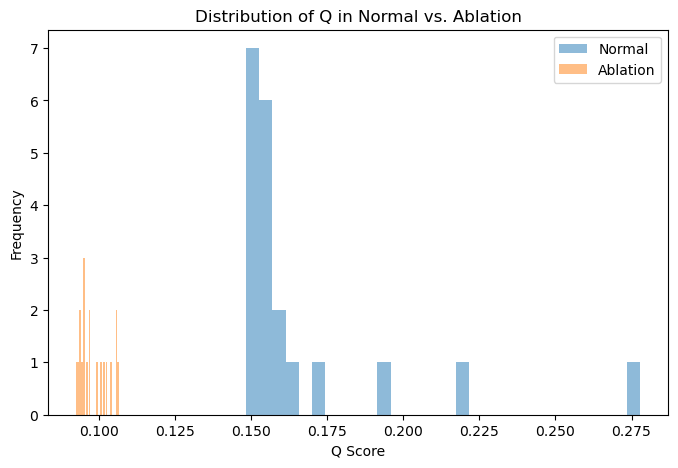

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(result_normal['q'], bins=30, alpha=0.5, label='Normal')
plt.hist(result_ablation['q'], bins=30, alpha=0.5, label='Ablation')
plt.xlabel('Q Score')
plt.ylabel('Frequency')
plt.title('Distribution of Q in Normal vs. Ablation')
plt.legend()
plt.show()